In [1]:
from __future__ import annotations
import base64
from collections import Counter
from copy import deepcopy
from IPython.display import clear_output, display
import random as r
import time as t

from balatro_classes import *
from balatro_enums import *

In [102]:
class Balatro:
    ANTE_BASE_CHIPS = [
        100, 300, 800, 2000, 5000, 11000, 20000, 35000, 50000,
        110000, 560000, 7200000, 300000000, 47000000000, 2.9e13, 7.7e16, 8.6e20,
        4.2e25, 9.2e30, 9.2e36, 4.3e43, 9.7e50, 1.0e59, 5.8e67, 1.6e77,
        2.4e87, 1.9e98, 8.4e109, 2.0e122, 2.7e135, 2.1e149, 9.9e163, 2.7e179,
        4.4e195, 4.4e212, 2.8e230, 1.1e249, 2.7e268, 4.5e288, 4.8e309
    ]
    BASE_DECK_CARDS = [Card(suit, rank) for suit in Suit for rank in Rank]
    BLIND_INFO = {
        Blind.SMALL: [1, 1, 3],
        Blind.BIG: [1, 1.5, 4],
        Blind.HOOK: [1, 2, 5],
        Blind.CLUB: [1, 2, 5],
        Blind.PSYCHIC: [1, 2, 5],
        Blind.GOAD: [1, 2, 5],
        Blind.WINDOW: [1, 2, 5],
        Blind.MANACLE: [1, 2, 5],
        Blind.PILLAR: [1, 2, 5],
        Blind.HEAD: [1, 2, 5],
        Blind.HOUSE: [2, 2, 5],
        Blind.WALL: [2, 4, 5],
        Blind.WHEEL: [2, 2, 5],
        Blind.ARM: [2, 2, 5],
        Blind.FISH: [2, 2, 5],
        Blind.WATER: [2, 2, 5],
        Blind.MOUTH: [2, 2, 5],
        Blind.NEEDLE: [2, 1, 5],
        Blind.FLINT: [2, 2, 5],
        Blind.MARK: [2, 2, 5],
        Blind.EYE: [3, 2, 5],
        Blind.TOOTH: [3, 2, 5],
        Blind.PLANT: [4, 2, 5],
        Blind.SERPENT: [5, 2, 5],
        Blind.OX: [6, 2, 5],
        Blind.FINAL_ACORN: [8, 2, 8],
        Blind.FINAL_LEAF: [8, 2, 8],
        Blind.FINAL_VESSEL: [8, 6, 8],
        Blind.FINAL_HEART: [8, 2, 8],
        Blind.FINAL_BELL: [8, 2, 8]
    }
    EDITION_COSTS = {
        Edition.BASE: 0,
        Edition.FOIL: 2,
        Edition.HOLO: 3,
        Edition.POLYCHROME: 5,
        Edition.NEGATIVE: 5
    }
    FACE_RANKS = {Rank.KING, Rank.QUEEN, Rank.JACK}
    HAND_BASE_SCORE = {
        PokerHand.FLUSH_FIVE: [160, 16],
        PokerHand.FLUSH_HOUSE: [140, 14],
        PokerHand.FIVE_OF_A_KIND: [120, 12],
        PokerHand.STRAIGHT_FLUSH: [100, 8],
        PokerHand.FOUR_OF_A_KIND: [60, 7],
        PokerHand.FULL_HOUSE: [40, 4],
        PokerHand.FLUSH: [35, 4],
        PokerHand.STRAIGHT: [30, 4],
        PokerHand.THREE_OF_A_KIND: [30, 3],
        PokerHand.TWO_PAIR: [20, 2],
        PokerHand.PAIR: [10, 2],
        PokerHand.HIGH_CARD: [5, 1]
    }
    HAND_SCALING = {
        PokerHand.FLUSH_FIVE: [50, 3],
        PokerHand.FLUSH_HOUSE: [40, 4],
        PokerHand.FIVE_OF_A_KIND: [35, 3],
        PokerHand.STRAIGHT_FLUSH: [40, 4],
        PokerHand.FOUR_OF_A_KIND: [30, 3],
        PokerHand.FULL_HOUSE: [25, 2],
        PokerHand.FLUSH: [15, 2],
        PokerHand.STRAIGHT: [30, 3],
        PokerHand.THREE_OF_A_KIND: [20, 2],
        PokerHand.TWO_PAIR: [20, 1],
        PokerHand.PAIR: [15, 1],
        PokerHand.HIGH_CARD: [10, 1]
    }
    JOKER_BASE_COSTS = {
        JokerType.JOKER: 2,
        JokerType.GREEDY_JOKER: 5,
        JokerType.LUSTY_JOKER: 5,
        JokerType.WRATHFUL_JOKER: 5,
        JokerType.GLUTTENOUS_JOKER: 5,
        JokerType.JOLLY: 3,
        JokerType.ZANY: 4,
        JokerType.MAD: 4,
        JokerType.CRAZY: 4,
        JokerType.DROLL: 4,
        JokerType.SLY: 3,
        JokerType.WILY: 4,
        JokerType.CLEVER: 4,
        JokerType.DEVIOUS: 4,
        JokerType.CRAFTY: 4,
        JokerType.HALF: 5,
        JokerType.CREDIT_CARD: 1,
        JokerType.BANNER: 5,
        JokerType.MYSTISUMMIT: 5,
        JokerType._8_BALL: 5,
        JokerType.MISPRINT: 4,
        JokerType.RAISED_FIST: 5,
        JokerType.CHAOS: 4,
        JokerType.SCARY_FACE: 4,
        JokerType.ABSTRACT: 4,
        JokerType.DELAYED_GRAT: 4,
        JokerType.GROS_MICHEL: 5,
        JokerType.EVEN_STEVEN: 4,
        JokerType.ODD_TODD: 4,
        JokerType.SCHOLAR: 4,
        JokerType.BUSINESS: 4,
        JokerType.SUPERNOVA: 5,
        JokerType.RIDE_THE_BUS: 6,
        JokerType.EGG: 4,
        JokerType.RUNNER: 5,
        JokerType.ICE_CREAM: 5,
        JokerType.SPLASH: 3,
        JokerType.BLUE_JOKER: 5,
        JokerType.FACELESS: 4,
        JokerType.GREEN_JOKER: 4,
        JokerType.SUPERPOSITION: 4,
        JokerType.TODO_LIST: 4,
        JokerType.CAVENDISH: 4,
        JokerType.RED_CARD: 5,
        JokerType.SQUARE: 4,
        JokerType.RIFF_RAFF: 6,
        JokerType.PHOTOGRAPH: 5,
        JokerType.RESERVED_PARKING: 6,
        JokerType.MAIL: 4,
        JokerType.HALLUCINATION: 4,
        JokerType.FORTUNE_TELLER: 6,
        JokerType.JUGGLER: 4,
        JokerType.DRUNKARD: 4,
        JokerType.GOLDEN: 6,
        JokerType.POPCORN: 5,
        JokerType.WALKIE_TALKIE: 4,
        JokerType.SMILEY: 4,
        JokerType.TICKET: 5,
        JokerType.SWASHBUCKLER: 4,
        JokerType.HANGING_CHAD: 4,
        JokerType.SHOOT_THE_MOON: 5,
        JokerType.STENCIL: 8,
        JokerType.FOUR_FINGERS: 7,
        JokerType.MIME: 5,
        JokerType.CEREMONIAL: 6,
        JokerType.MARBLE: 6,
        JokerType.LOYALTY_CARD: 5,
        JokerType.DUSK: 5,
        JokerType.FIBONACCI: 8,
        JokerType.STEEL_JOKER: 7,
        JokerType.HACK: 6,
        JokerType.PAREIDOLIA: 5,
        JokerType.SPACE: 5,
        JokerType.BURGLAR: 6,
        JokerType.BLACKBOARD: 6,
        JokerType.SIXTH_SENSE: 6,
        JokerType.CONSTELLATION: 6,
        JokerType.HIKER: 5,
        JokerType.CARD_SHARP: 6,
        JokerType.MADNESS: 7,
        JokerType.SEANCE: 6,
        JokerType.VAMPIRE: 7,
        JokerType.SHORTCUT: 7,
        JokerType.HOLOGRAM: 7,
        JokerType.CLOUD_9: 7,
        JokerType.ROCKET: 6,
        JokerType.MIDAS_MASK: 7,
        JokerType.LUCHADOR: 5,
        JokerType.GIFT: 6,
        JokerType.TURTLE_BEAN: 6,
        JokerType.EROSION: 6,
        JokerType.TO_THE_MOON: 5,
        JokerType.STONE: 6,
        JokerType.LUCKY_CAT: 6,
        JokerType.BULL: 6,
        JokerType.DIET_COLA: 6,
        JokerType.TRADING: 6,
        JokerType.FLASH: 5,
        JokerType.TROUSERS: 6,
        JokerType.RAMEN: 6,
        JokerType.SELZER: 6,
        JokerType.CASTLE: 6,
        JokerType.MR_BONES: 5,
        JokerType.ACROBAT: 6,
        JokerType.SOCK_AND_BUSKIN: 6,
        JokerType.TROUBADOUR: 6,
        JokerType.CERTIFICATE: 6,
        JokerType.SMEARED: 7,
        JokerType.THROWBACK: 6,
        JokerType.ROUGH_GEM: 7,
        JokerType.BLOODSTONE: 7,
        JokerType.ARROWHEAD: 7,
        JokerType.ONYX_AGATE: 7,
        JokerType.GLASS: 6,
        JokerType.RING_MASTER: 5,
        JokerType.FLOWER_POT: 6,
        JokerType.MERRY_ANDY: 7,
        JokerType.OOPS: 4,
        JokerType.IDOL: 6,
        JokerType.SEEING_DOUBLE: 6,
        JokerType.MATADOR: 7,
        JokerType.SATELLITE: 6,
        JokerType.CARTOMANCER: 6,
        JokerType.ASTRONOMER: 8,
        JokerType.BOOTSTRAPS: 7,
        JokerType.DNA: 8,
        JokerType.VAGABOND: 8,
        JokerType.BARON: 8,
        JokerType.OBELISK: 8,
        JokerType.BASEBALL: 8,
        JokerType.ANCIENT: 8,
        JokerType.CAMPFIRE: 9,
        JokerType.BLUEPRINT: 10,
        JokerType.WEE: 8,
        JokerType.HIT_THE_ROAD: 8,
        JokerType.DUO: 8,
        JokerType.TRIO: 8,
        JokerType.FAMILY: 8,
        JokerType.ORDER: 8,
        JokerType.TRIBE: 8,
        JokerType.STUNTMAN: 7,
        JokerType.INVISIBLE: 8,
        JokerType.BRAINSTORM: 10,
        JokerType.DRIVERS_LICENSE: 7,
        JokerType.BURNT: 8,
        JokerType.CAINO: 20,
        JokerType.TRIBOULET: 20,
        JokerType.YORICK: 20,
        JokerType.CHICOT: 20,
        JokerType.PERKEO: 20
    }
    JOKER_BASE_EDITION_CHANCES = {
        Edition.BASE: 96,
        Edition.NEGATIVE: 0.3,
        Edition.POLYCHROME: 0.3,
        Edition.HOLO: 1.4,
        Edition.FOIL: 2
    }
    JOKER_BASE_EDITION_CHANCES_HONE = {
        Edition.BASE: 92,
        Edition.NEGATIVE: 0.3,
        Edition.POLYCHROME: 0.9,
        Edition.HOLO: 2.8,
        Edition.FOIL: 4
    }
    JOKER_BASE_EDITION_CHANCES_GLOW_UP = {
        Edition.BASE: 84,
        Edition.NEGATIVE: 0.3,
        Edition.POLYCHROME: 2.1,
        Edition.HOLO: 5.6,
        Edition.FOIL: 8
    }
    JOKER_BASE_RARITY_WEIGHTS = {
        Rarity.COMMON: 70,
        Rarity.UNCOMMON: 25,
        Rarity.RARE: 5
    }
    JOKER_TYPE_RARITIES = {
        Rarity.COMMON: list(JokerType)[:61],
        Rarity.UNCOMMON: list(JokerType)[61:61+64],
        Rarity.RARE: list(JokerType)[61+64:61+64+20],
        Rarity.LEGENDARY: list(JokerType)[61+64+20:61+64+20+5]
    }
    NON_COPYABLE_JOKERS = {
        JokerType.CREDIT_CARD,
        JokerType.CHAOS,
        JokerType.DELAYED_GRAT,
        JokerType.EGG,
        JokerType.SPLASH,
        JokerType.JUGGLER,
        JokerType.DRUNKARD,
        JokerType.GOLDEN,
        JokerType.FOUR_FINGERS,
        JokerType.PAREIDOLIA,
        JokerType.SIXTH_SENSE,
        JokerType.SHORTCUT,
        JokerType.CLOUD_9,
        JokerType.ROCKET,
        JokerType.MIDAS_MASK,
        JokerType.GIFT,
        JokerType.TURTLE_BEAN,
        JokerType.TO_THE_MOON,
        JokerType.TRADING,
        JokerType.MR_BONES,
        JokerType.TROUBADOUR,
        JokerType.SMEARED,
        JokerType.RING_MASTER,
        JokerType.MERRY_ANDY,
        JokerType.OOPS,
        JokerType.SATELLITE,
        JokerType.ASTRONOMER,
        JokerType.INVISIBLE,
        JokerType.CHICOT,

        JokerType.BLUEPRINT,
        JokerType.BRAINSTORM
    }
    NON_ETERNAL_JOKERS = {
        JokerType.GROS_MICHEL,
        JokerType.ICE_CREAM,
        JokerType.CAVENDISH,
        JokerType.POPCORN,
        JokerType.LUCHADOR,
        JokerType.TURTLE_BEAN,
        JokerType.DIET_COLA,
        JokerType.RAMEN,
        JokerType.SELZER,
        JokerType.MR_BONES,
        JokerType.INVISIBLE
    }
    NON_PERISHABLE_JOKERS = {
        JokerType.RIDE_THE_BUS,
        JokerType.RUNNER,
        JokerType.GREEN_JOKER,
        JokerType.RED_CARD,
        JokerType.SQUARE,
        JokerType.CEREMONIAL,
        JokerType.CONSTELLATION,
        JokerType.MADNESS,
        JokerType.VAMPIRE,
        JokerType.HOLOGRAM,
        JokerType.ROCKET,
        JokerType.LUCKY_CAT,
        JokerType.FLASH,
        JokerType.TROUSERS,
        JokerType.CASTLE,
        JokerType.GLASS,
        JokerType.OBELISK,
        JokerType.WEE
    }
    PROHIBITED_ANTE_1_TAGS = {Tag.NEGATIVE, Tag.STANDARD, Tag.METEOR, Tag.BUFFOON, Tag.HANDY, Tag.GARBAGE, Tag.ETHEREAL, Tag.TOP_UP, Tag.ORBITAL}
    RANK_CHIPS = {
        Rank.ACE: 11,
        Rank.KING: 10,
        Rank.QUEEN: 10,
        Rank.JACK: 10,
        Rank._10: 10,
        Rank._9: 9, 
        Rank._8: 8,
        Rank._7: 7,
        Rank._6: 6,
        Rank._5: 5,
        Rank._4: 4,
        Rank._3: 3,
        Rank._2: 2
    }
    SHOP_BASE_CARD_WEIGHTS = {
        Joker: 20,
        Tarot: 4,
        Planet: 4
    }
    SHOP_BASE_PACK_WEIGHTS = {
        Pack.ARCANA_NORMAL: 4,
        Pack.ARCANA_JUMBO: 2,
        Pack.ARCANA_MEGA: 0.5,
        Pack.CELESTIAL_NORMAL: 4,
        Pack.CELESTIAL_JUMBO: 2,
        Pack.CELESTIAL_MEGA: 0.5,
        Pack.SPECTRAL_NORMAL: 0.6,
        Pack.SPECTRAL_JUMBO: 0.3,
        Pack.SPECTRAL_MEGA: 0.07,
        Pack.STANDARD_NORMAL: 4,
        Pack.STANDARD_JUMBO: 2,
        Pack.STANDARD_MEGA: 0.5,
        Pack.BUFFOON_NORMAL: 1.2,
        Pack.BUFFOON_JUMBO: 0.6,
        Pack.BUFFOON_MEGA: 0.5,
    }
    STRAIGHT_RANKS = {(Rank.ACE, Rank.KING, Rank.QUEEN, Rank.JACK, Rank._10),
                      (Rank.KING, Rank.QUEEN, Rank.JACK, Rank._10, Rank._9),
                      (Rank.QUEEN, Rank.JACK, Rank._10, Rank._9, Rank._8),
                      (Rank.JACK, Rank._10, Rank._9, Rank._8, Rank._7),
                      (Rank._10, Rank._9, Rank._8, Rank._7, Rank._6),
                      (Rank._9, Rank._8, Rank._7, Rank._6, Rank._5),
                      (Rank._8, Rank._7, Rank._6, Rank._5, Rank._4),
                      (Rank._7, Rank._6, Rank._5, Rank._4, Rank._3),
                      (Rank._6, Rank._5, Rank._4, Rank._3, Rank._2),
                      (Rank.ACE, Rank._5, Rank._4, Rank._3, Rank._2)}
    TAG_PACKS = {
        Tag.BUFFOON: Pack.BUFFOON_MEGA,
        Tag.CHARM: Pack.ARCANA_MEGA,
        Tag.METEOR: Pack.CELESTIAL_MEGA,
        Tag.ETHEREAL: Pack.SPECTRAL_NORMAL,
        Tag.STANDARD: Pack.STANDARD_MEGA
    }

    def __init__(self, deck: Deck, stake: Stake, seed: str | None = None) -> None:
        # TODO: seeding
        r.seed(seed)

        self.deck = deck
        self.stake = stake
        self.starting_hands = 4
        self.starting_discards = 3
        self.money = 4
        self.ante = 1
        self.round = 0

        self.hand_size = 8
        self.joker_slots = 5
        self.consumable_slots = 2

        self.remaining_hand_money = 1
        self.remaining_discard_money = 0
        self.interest = [1, 5]

        self.poker_hand_info = {poker_hand: [1, 0] for poker_hand in PokerHand}
        self.vouchers = set()
        self.tags = []

        self.deck_cards = deepcopy(Balatro.BASE_DECK_CARDS)

        match deck:
            case Deck.RED:
                self.starting_discards += 1
            case Deck.BLUE:
                self.starting_hands += 1
            case Deck.YELLOW:
                self.money += 10
            case Deck.GREEN:
                self.remaining_hand_money = 2
                self.remaining_discard_money = 1
                self.interest[0] = 0
            case Deck.BLACK:
                self.joker_slots += 1
                self.starting_hands -= 1
            case Deck.MAGIC:
                self.vouchers.add(Voucher.CRYSTAL_BALL)
                self.consumable_slots += 1
                self.consumables.extend([Consumable(Tarot.FOOL), Consumable(Tarot.FOOL)])
            case Deck.NEBULA:
                self.vouchers.add(Voucher.TELESCOPE)
                self.consumable_slots -= 1
            case Deck.GHOST:
                self.consumables.append(Consumable(Spectral.HEX))
            case Deck.ABANDONED:
                self.deck_cards = [card for card in self.deck_cards if card.rank not in Balatro.FACE_RANKS]
            case Deck.CHECKERED:
                self.deck_cards = self.deck_cards[:26] + self.deck_cards[:26]
            case Deck.ZODIAC:
                self.vouchers.update([Voucher.TAROT_MERCHANT, Voucher.PLANET_MERCHANT, Voucher.OVERSTOCK_NORM])
            case Deck.PAINTED:
                self.hand_size += 2
                self.joker_slots -= 1
            case Deck.ANAGLYPH:
                pass
            case Deck.PLASMA:
                pass
            case Deck.ERRATIC:
                self.deck_cards = [self._get_random_card() for _ in range(52)]
        
        self.ante_tags = [None, None]
        for i in range(2):
            while self.ante_tags[i] is None or self.ante == 1 and self.ante_tags[i][0] in Balatro.PROHIBITED_ANTE_1_TAGS:
                tag = r.choice(list(Tag))
                extra = None

                if tag is Tag.ORBITAL:
                    extra = r.choice(self.unlocked_poker_hands)
                
                self.ante_tags[i] = (tag, extra)

        self._random_final_blind()
        
        self.blind = Blind.SMALL

        self.jokers = []
        self.consumables = []

        self.played_hands = 0
        self.unused_discards = 0
        self.blinds_skipped = 0

        self.round_score = None
        self.round_goal = None
        self.hands = None
        self.discards = None
        self.hand = None
        self.deck_cards_left = None

        self.reroll_cost = None
        self.chaos_rerolls = None
        self.shop_cards = None
        self.shop_vouchers = None
        self.shop_packs = None
        self.got_guaranteed_buffoon = False
        self.gros_michel_destroyed = False

        self.state = State.SELECTING_BLIND
    
    def _repr_html_(self) -> str:
        match self.state:
            case State.IN_SHOP:
                return self._shop_display_str()
            case _:
                raise NotImplementedError

    def _add_joker(self, joker: Joker) -> None:
        match joker:
            case JokerType.CHAOS:
                if self.chaos_rerolls is not None:
                    self.chaos_rerolls += 1
        
        self.jokers.append(joker)

    def _calculate_buy_cost(self, item: Joker | Consumable | Card | Pack | Voucher, coupon: bool = False) -> int:
        if coupon and not isinstance(item, Voucher):
            return 0
        
        edition_cost = 0
        discount_percent = 0.5 if Voucher.LIQUIDATION in self.vouchers else 0.75 if Voucher.CLEARANCE_SALE in self.vouchers else 1.0

        match item:
            case Joker():
                base_cost = Balatro.JOKER_BASE_COSTS[item.joker_type]
                edition_cost = Balatro.EDITION_COSTS[item.edition]
            case Consumable():
                match item.consumable_type:
                    case Tarot():
                        base_cost = 3
                    case Planet():
                        if JokerType.ASTRONOMER in self.jokers:
                            return 0
                        base_cost = 3
                    case Spectral():
                        base_cost = 4
                edition_cost = Balatro.EDITION_COSTS[Edition.NEGATIVE if item.is_negative else Edition.BASE]
            case Card():
                base_cost = 1
                edition_cost = Balatro.EDITION_COSTS[item.edition]
            case Pack():
                if item.name.startswith('CELESTIAL') and JokerType.ASTRONOMER in self.jokers:
                    return 0
                if item.name.endswith('MEGA'):
                    base_cost = 8
                elif item.name.endswith('JUMBO'):
                    base_cost = 6
                elif item.name.endswith('NORMAL'):
                    base_cost = 4
            case Voucher():
                base_cost = 10
                discount_percent = 1.0
        
        buy_cost = (base_cost + edition_cost) * discount_percent
        return max(round(buy_cost - 0.001), 1)
    
    def _chance(hit: int, pool: int) -> bool:
        return r.randint(hit, pool) == 1

    def _deal(self) -> None:
        num_cards = self.hand_size - len(self.hand)
        if num_cards <= 0:
            return
        deal_indices = sorted(r.sample(range(len(self.deck_cards_left)), num_cards), reverse=True)
        for i in deal_indices:
            self.hand.append(self.deck_cards_left.pop(i))
        
        self._sort_hand()

    def _end_round(self) -> None:
        self.unused_discards += self.discards

        interest_amt, interest_per = self.interest
        interest = max(0, self.money) // interest_per * interest_amt
        cash_out = self.BLIND_INFO[self.blind][2] + self.remaining_hand_money * self.hands + self.remaining_discard_money * self.discards + interest
        self.money += cash_out

        self.round_score = None
        self.round_goal = None
        self.hands = None
        self.discards = None
        self.hand = None
        self.deck_cards_left = None

        self._populate_shop()
        self.state = State.IN_SHOP

    def _get_poker_hand(self, cards: list[Card]) -> tuple[PokerHand, list[int]]:
        best_hand = None
        scored_card_indices = {i for i, card in enumerate(cards) if card.enhancement is Enhancement.STONE}

        rank_counts = Counter(card.rank for card in cards if card.enhancement is not Enhancement.STONE)
        suit_counts = Counter(card.suit for card in cards if card.enhancement is not Enhancement.STONE and (card.debuffed or card.enhancement is not Enhancement.WILD))
        num_wilds = sum(not card.debuffed and card.enhancement is Enhancement.WILD for card in cards)

        flush_straight_len = 4 if (JokerType.FOUR_FINGERS in self.jokers) else 5
        max_straight_gap = 2 if (JokerType.SHORTCUT in self.jokers) else 1

        flush_suit = None
        if suit_counts:
            flush_suit, flush_suit_count = suit_counts.most_common(1)[0]
        else:
            flush_suit_count = 0
        is_flush = flush_suit_count + num_wilds >= flush_straight_len
        
        # ranks matching
        for rank, n in rank_counts.most_common():
            match n:
                case 5:
                    best_hand = PokerHand.FLUSH_FIVE if is_flush else PokerHand.FIVE_OF_A_KIND
                    scored_card_indices = set(range(5))
                    return best_hand, scored_card_indices
                case 4:
                    best_hand = PokerHand.FOUR_OF_A_KIND
                    scored_card_indices.update(i for i, card in enumerate(cards) if card.rank is rank)
                    return best_hand, scored_card_indices
                case 3:
                    best_hand = PokerHand.THREE_OF_A_KIND
                    scored_card_indices.update(i for i, card in enumerate(cards) if card.rank is rank)
                case 2:
                    if best_hand is PokerHand.THREE_OF_A_KIND:
                        best_hand = PokerHand.FLUSH_HOUSE if is_flush else PokerHand.FULL_HOUSE
                        scored_card_indices = set(range(5))
                        return best_hand, scored_card_indices
                    elif best_hand is PokerHand.PAIR:
                        best_hand = PokerHand.TWO_PAIR
                        scored_card_indices.update(i for i, card in enumerate(cards) if card.rank is rank)
                    else:
                        best_hand = PokerHand.PAIR
                        scored_card_indices.update(i for i, card in enumerate(cards) if card.rank is rank)
                case 1:
                    break
        
        # flush
        if is_flush:
            best_hand = PokerHand.FLUSH
            scored_card_indices.update(i for i, card in enumerate(cards) if card.suit is flush_suit or (not card.debuffed and card.enhancement is Enhancement.WILD))
        
        # straight
        if len(rank_counts) >= flush_straight_len:
            sorted_ranks = sorted(rank_counts)

            longest_straight = set()
            cur_straight = set()
            for i in range(len(sorted_ranks)):
                cur_straight.add(sorted_ranks[i])
                if len(cur_straight) > len(longest_straight):
                    longest_straight = cur_straight
                if i < len(sorted_ranks) - 1 and int(sorted_ranks[i + 1]) - int(sorted_ranks[i]) > max_straight_gap:
                    cur_straight = set()

            if int(min(longest_straight)) <= max_straight_gap + 1 and Rank.ACE in rank_counts:
                longest_straight.add(Rank.ACE)

            if len(longest_straight) >= flush_straight_len:
                best_hand = PokerHand.STRAIGHT_FLUSH if best_hand is PokerHand.FLUSH else PokerHand.STRAIGHT
                scored_card_indices.update(i for i, card in enumerate(cards) if card.rank in longest_straight)
                return best_hand, scored_card_indices
        
        # high card
        if best_hand is None:
            best_hand = PokerHand.HIGH_CARD
            scored_card_indices.update(i for i, card in enumerate(cards) if card.rank is max(rank_counts))

        return best_hand, scored_card_indices

    def _get_random_card(self, allow_modifiers: bool = False) -> Card:
        card = Card(r.choice(list(Suit)), r.choice(list(Rank)))

        if allow_modifiers:
            raise NotImplementedError
        
        return card

    def _get_random_joker(self, rarity: Rarity | None = None, prohibited: list[JokerType] | None = None) -> Joker:
        if rarity is None:
            rarity = r.choices(list(Balatro.JOKER_BASE_RARITY_WEIGHTS), weights=Balatro.JOKER_BASE_RARITY_WEIGHTS.values(), k=1)[0]
        
        joker_type = None
        while joker_type is None or (JokerType.RING_MASTER not in self.jokers and (joker_type in self.jokers or (prohibited is not None and joker_type in prohibited))) or (joker_type is JokerType.CAVENDISH and not self.gros_michel_destroyed) or (joker_type is JokerType.TICKET and not any(card.enhancement is Enhancement.GOLD for card in self.deck_cards)) or (joker_type is JokerType.STEEL_JOKER and not any(card.enhancement is Enhancement.STEEL for card in self.deck_cards)) or (joker_type is JokerType.STONE and not any(card.enhancement is Enhancement.STONE for card in self.deck_cards)) or (joker_type is JokerType.LUCKY_CAT and not any(card.enhancement is Enhancement.LUCKY for card in self.deck_cards)) or (joker_type is JokerType.GLASS and not any(card.enhancement is Enhancement.GLASS for card in self.deck_cards)):
            joker_type = r.choice(Balatro.JOKER_TYPE_RARITIES[rarity])
        
        edition_chances = Balatro.JOKER_BASE_EDITION_CHANCES_GLOW_UP if Voucher.GLOW_UP in self.vouchers else Balatro.JOKER_BASE_EDITION_CHANCES_HONE if Voucher.HONE in self.vouchers else Balatro.JOKER_BASE_EDITION_CHANCES
        edition = r.choices(list(edition_chances), weights=edition_chances.values(), k=1)[0]
        
        return Joker(joker_type, edition)

    def _get_random_tarot(self) -> Card:
        tarot = None
        while tarot is None or (JokerType.RING_MASTER not in self.jokers and tarot in self.consumables):
            tarot = r.choice(list(Tarot))

        return Consumable(tarot)

    def _next_blind(self) -> None:
        match self.blind:
            case Blind.SMALL:
                self.blind = Blind.BIG
            case Blind.BIG:
                self.blind = self.final_blind
            case _:
                raise NotImplementedError
    
    def _open_pack(self, pack: Pack) -> None:
        if pack.name.endswith('MEGA'):
            choose = [2, 5]
        elif pack.name.endswith('JUMBO'):
            choose = [1, 5]
        elif pack.name.endswith('NORMAL'):
            choose = [1, 3]

        match pack:
            case Pack.BUFFOON_NORMAL | Pack.BUFFOON_JUMBO | Pack.BUFFOON_MEGA:
                choose[1] -= 1
                raise NotImplementedError
            case Pack.ARCANA_NORMAL | Pack.ARCANA_JUMBO | Pack.ARCANA_MEGA:
                raise NotImplementedError
            case Pack.CELESTIAL_NORMAL | Pack.CELESTIAL_JUMBO | Pack.CELESTIAL_MEGA:
                raise NotImplementedError
            case Pack.SPECTRAL_NORMAL | Pack.SPECTRAL_JUMBO | Pack.SPECTRAL_MEGA:
                choose[1] -= 1
                raise NotImplementedError
            case Pack.STANDARD_NORMAL | Pack.STANDARD_JUMBO | Pack.STANDARD_MEGA:
                raise NotImplementedError

    def _populate_shop(self) -> None:
        coupon = False
        if Tag.COUPON in self.tags:
            coupon = True
            self.tags.remove(Tag.COUPON)
        
        self.reroll_cost = 5
        if Tag.D_SIX in self.tags:
            self.tags.remove(Tag.D_SIX)
            self.reroll_cost = 0
        
        self.chaos_rerolls = self.jokers.count(JokerType.CHAOS)

        self._populate_shop_cards(coupon=coupon)

        needed_vouchers = 0
        if self.shop_vouchers is None:
            self.shop_vouchers = []
            needed_vouchers = 1
        while Tag.VOUCHER in self.tags:
            self.tags.remove(Tag.VOUCHER)
            needed_vouchers += 1
        
        if needed_vouchers > 0:
            voucher_list = list(Voucher)
            possible_vouchers = []
            for base_voucher, upgraded_voucher in zip(voucher_list[:10], voucher_list[10:]):
                if upgraded_voucher in self.vouchers:
                    continue
                possible_voucher = upgraded_voucher if base_voucher in self.vouchers else base_voucher
                if possible_voucher in self.shop_vouchers:
                    continue
                possible_vouchers.append(possible_voucher)
            
            for _ in range(needed_vouchers):
                voucher = r.choice(possible_vouchers)
                buy_cost = self._calculate_buy_cost(voucher, coupon=coupon)
                self.shop_vouchers.append((voucher, buy_cost))
                possible_vouchers.remove(voucher)
        
        self.shop_packs = r.choices(list(Balatro.SHOP_BASE_PACK_WEIGHTS), weights=Balatro.SHOP_BASE_PACK_WEIGHTS.values(), k=2)
        if not self.got_guaranteed_buffoon:
            self.shop_packs[0] = Pack.BUFFOON_NORMAL
            self.got_guaranteed_buffoon = True
        for i, pack in enumerate(self.shop_packs):
            buy_cost = self._calculate_buy_cost(pack, coupon=coupon)
            self.shop_packs[i] = (pack, buy_cost)
    
    def _populate_shop_cards(self, coupon: bool = False) -> None:
        shop_card_weights = Balatro.SHOP_BASE_CARD_WEIGHTS.copy()
        if Voucher.MAGIC_TRICK in self.vouchers:
            shop_card_weights[Card] = 4
        if Voucher.TAROT_TYCOON in self.vouchers:
            shop_card_weights[Tarot] = 32
        elif Voucher.TAROT_MERCHANT in self.vouchers:
            shop_card_weights[Tarot] = 9.6
        if Voucher.PLANET_TYCOON in self.vouchers:
            shop_card_weights[Planet] = 32
        elif Voucher.PLANET_MERCHANT in self.vouchers:
            shop_card_weights[Planet] = 9.6
        if self.deck is Deck.GHOST:
            shop_card_weights[Spectral] = 2
        
        self.shop_cards = r.choices(list(shop_card_weights), weights=shop_card_weights.values(), k=(4 if Voucher.OVERSTOCK_PLUS in self.vouchers else 3 if Voucher.OVERSTOCK_NORM in self.vouchers else 2))
        joker_tags_used = 0
        for tag in self.tags:
            if tag is Tag.UNCOMMON or tag is Tag.RARE:
                self.shop_cards[joker_tags_used] = Joker
                joker_tags_used += 1
                if joker_tags_used == 2:
                    break
        
        for i in range(len(self.shop_cards)):
            match self.shop_cards[i].__name__:
                case Joker.__name__:
                    buy_cost = None

                    rarity = None
                    for tag in self.tags[:]:
                        if tag is Tag.UNCOMMON or tag is Tag.RARE:
                            self.tags.remove(tag)
                            rarity = Rarity[tag.name]
                            buy_cost = 0
                            break
                    
                    joker = self._get_random_joker(rarity=rarity, prohibited=[card.joker_type for card, _ in self.shop_cards[:i] if isinstance(card, Joker)])
                    
                    if joker.edition is Edition.BASE:
                        for tag in self.tags[:]:
                             if tag.name in Edition._member_map_:
                                self.tags.remove(tag)
                                joker.edition = Edition[tag.name]
                                buy_cost = 0
                                break
                    
                    if buy_cost is None:
                        buy_cost = self._calculate_buy_cost(joker, coupon=coupon)
                    self.shop_cards[i] = (joker, buy_cost)
                case Tarot.__name__:
                    tarot = None
                    while tarot is None or (JokerType.RING_MASTER not in self.jokers and (tarot in self.consumables or tarot in [card for card, _ in self.shop_cards[:i]])):
                        tarot = r.choice(list(Tarot))
                    consumable = Consumable(tarot)
                    buy_cost = self._calculate_buy_cost(consumable, coupon=coupon)
                    self.shop_cards[i] = (consumable, buy_cost)
                case Planet.__name__:
                    planet = None
                    while planet is None or (JokerType.RING_MASTER not in self.jokers and (planet in self.consumables or planet in [card for card, _ in self.shop_cards[:i]])):
                        planet = r.choice(self.unlocked_poker_hands).planet
                    consumable = Consumable(planet)
                    buy_cost = self._calculate_buy_cost(consumable, coupon=coupon)
                    self.shop_cards[i] = (consumable, buy_cost)
                case Spectral.__name__:
                    spectral = None
                    while spectral is None or (JokerType.RING_MASTER not in self.jokers and (spectral in self.consumables or spectral in [card for card, _ in self.shop_cards[:i]])):
                        spectral = r.choice(list(Spectral)[:-2])
                    consumable = Consumable(spectral)
                    buy_cost = self._calculate_buy_cost(consumable, coupon=coupon)
                    self.shop_cards[i] = (consumable, buy_cost)
                case Card.__name__:
                    card = self._get_random_card(allow_modifiers=(Voucher.ILLUSION in self.vouchers))
                    buy_cost = self._calculate_buy_cost(card, coupon=coupon)
                    self.shop_cards[i] = (card, buy_cost)
    
    def _random_final_blind(self) -> None:
        if self.ante % 8 == 0:
            self.final_blind = r.choice(list(Balatro.BLIND_INFO)[-5:])
        else:
            self.final_blind = None
            while self.final_blind is None or Balatro.BLIND_INFO[self.final_blind][0] > self.ante:
                self.final_blind = r.choice(list(Balatro.BLIND_INFO)[2:-5])

    def _remove_joker(self, joker: Joker) -> None:
        raise NotImplementedError

        match joker:
            case JokerType.CHAOS:
                if self.chaos_rerolls is not None and self.chaos_rerolls > 0:
                    self.chaos_rerolls -= 1

    def _shop_display_str(self) -> str:
        with open('resources/fonts/m6x11plus.ttf', 'rb') as f:
            font_base64 = base64.b64encode(f.read()).decode('utf-8')
        
        reroll_cost = self.next_reroll_cost
        can_reroll = self.money >= reroll_cost
        
        html = f"""
        <style>
        @font-face {{
            font-family: 'm6x11plus';
            src: url(data:font/ttf;base64,{font_base64});
        }}
        * {{
            font-family: 'm6x11plus', monospace;
        }}
        </style>
        <div style='display: flex; flex-direction: column; width: 800px; background-color: #1d2829; border-radius: 20px;'>
            <div style='display: flex;'>
                <div style='width: 25%; padding: 10px; display: flex; flex-direction: column; justify-content: center; align-items: center;'>
                    <div style='text-align: center; margin-bottom: 10px; width: 100%; height: 50%;'>
                        <button style='background-color: #e35646; color: white; padding: 10px 10px; width: 100%; height: 100%; border-radius: 20px; font-size: 28px;'>Next<br/>Round</button>
                    </div>
                    <div style='text-align: center; width: 100%; height: 50%;'>
                        <button style='background-color: {'#5cb284' if can_reroll else '#4f4f4f'}; color: {'white' if can_reroll else '#646464'}; padding: 10px 10px; width: 100%; height: 100%; border-radius: 20px; font-size: 28px;'>Reroll<br><span style='font-size: 56px;'>${reroll_cost}</span></button>
                    </div>
                </div>
                <div style='width: 75%; background-color: #3a4b50; border-radius: 20px; padding: 10px; margin: 10px;'>
                    <div style='display: flex; flex-wrap: wrap; justify-content: center;'>
        """
        for item, cost in self.shop_cards:
            png_bytes = item._repr_png_()
            png_base64 = base64.b64encode(png_bytes).decode('utf-8')
            item_html = f"<img src='data:image/png;base64,{png_base64}'/>"

            html += f"""
                    <div style='display: flex; flex-direction: column; align-items: center; margin-right: 10px; padding-bottom: 20px; text-align: center;'>
                        <div style='width: 50px; background-color: #333b3d; border-radius: 25%; border: 3px solid black'><strong style='color: #d7af54; font-size:28px;'>${cost}</strong></div>
                        <div style='text-align: center;'>{item_html}</div>
                    </div>
            """
        html += """
                    </div>
                </div>
            </div>
            <div style='display: flex;'>
                <div style='width: 50%; border: 10px solid #3a4b50; border-radius: 20px; padding: 10px; margin: 10px;'>
                    <div style='display: flex; flex-wrap: wrap; justify-content: center;'>
        """
        for voucher, cost in self.shop_vouchers:
            png_bytes = voucher._repr_png_()
            png_base64 = base64.b64encode(png_bytes).decode('utf-8')
            voucher_html = f"<img src='data:image/png;base64,{png_base64}'/>"

            html += f"""
                        <div style='display: flex; flex-direction: column; align-items: center; margin-right: 10px; padding-bottom: 20px; text-align: center;'>
                            <div style='width: 50px; background-color: #333b3d; border-radius: 25%; border: 3px solid black'><strong style='color: #d7af54; font-size:28px;'>${cost}</strong></div>
                            <div style='text-align: center;'>{voucher_html}</div>
                        </div>
            """
        html += """
                    </div>
                </div>
                <div style='width: 50%; background-color: #3a4b50; border-radius: 20px; padding: 10px; margin: 10px;'>
                    <div style='display: flex; flex-wrap: wrap; justify-content: center;'>
        """
        for pack, cost in self.shop_packs:
            png_bytes = pack._repr_png_()
            png_base64 = base64.b64encode(png_bytes).decode('utf-8')
            pack_html = f"<img src='data:image/png;base64,{png_base64}' style='height: 220px;'/>"

            html += f"""
                        <div style='display: flex; flex-direction: column; align-items: center; margin-right: 10px; padding-bottom: 20px; text-align: center;'>
                            <div style='width: 50px; background-color: #333b3d; border-radius: 25%; border: 3px solid black'><strong style='color: #d7af54; font-size:28px;'>${cost}</strong></div>
                            <div style='text-align: center;'>{pack_html}</div>
                        </div>
            """
        html += """
                    </div>
                </div>
            </div>
        </div>
        """
        
        return html

    def _sort_hand(self, by_suit: bool = False) -> None:
        if by_suit:
            self.hand.sort(key=lambda card: (list(Suit).index(card.suit), list(Rank).index(card.rank)))
        else:
            self.hand.sort(key=lambda card: (list(Rank).index(card.rank), list(Suit).index(card.suit)))
    
    def buy_shop_item(self, section_index: int, item_index: int) -> None:
        assert section_index in [0, 1, 2]

        section_items = [self.shop_cards, self.shop_vouchers, self.shop_packs][section_index]

        assert 0 <= item_index < len(section_items)

        item, cost = section_items[item_index]

        assert self.money >= cost

        self.money -= cost
        section_items.pop(item_index)

        match item:
            case Joker():
                assert len(self.jokers) < self.effective_joker_slots

                self._add_joker(item)
            case Consumable():
                assert len(self.consumables) < self.effective_consumable_slots

                self.consumables.append(item)
            case Card():
                raise NotImplementedError
            case Pack():
                self.state = State.OPENING_PACK_SHOP
                self._open_pack(item)
            case Voucher():
                self.vouchers.add(item)

    def discard(self, *card_indices: int) -> None:
        assert self.state is State.PLAYING_BLIND

        assert self.discards > 0
        assert 1 <= len(card_indices) <= 5
        assert all(0 <= i < len(self.hand) for i in card_indices)
        assert len(set(card_indices)) == len(card_indices)

        self.discards -= 1

        for i in sorted(card_indices, reverse=True):
            self.hand.pop(i)
        
        self._deal()
    
    def next_round(self) -> None:
        assert self.state is State.IN_SHOP

        self.reroll_cost = None
        self.chaos_rerolls = None
        self.shop_cards = None
        self.shop_vouchers = None
        self.shop_packs = None

        self.state = State.SELECTING_BLIND
        self._next_blind()

    def play_hand(self, *card_indices: int) -> None:
        assert self.state is State.PLAYING_BLIND

        assert 1 <= len(card_indices) <= 5
        assert all(0 <= i < len(self.hand) for i in card_indices)
        assert len(set(card_indices)) == len(card_indices)

        self.played_hands += 1
        self.hands -= 1

        cards = [self.hand[i] for i in card_indices]
        poker_hand, scored_card_indices = self._get_poker_hand(cards)

        for _ in range((self.jokers + self.copied_jokers).count(JokerType.SPACE)):
            if self._chance(1, 4):
                self.poker_hand_info[poker_hand][0] += 1

        poker_hand_level = self.poker_hand_info[poker_hand][0]
        poker_hand_base_chips, poker_hand_base_mult = Balatro.HAND_BASE_SCORE[poker_hand]
        poker_hand_chips_scaling, poker_hand_mult_scaling = Balatro.HAND_SCALING[poker_hand]
        chips, mult = poker_hand_base_chips + poker_hand_chips_scaling * (poker_hand_level - 1), poker_hand_base_mult + poker_hand_mult_scaling * (poker_hand_level - 1)

        for i, scored_card in enumerate(cards):
            if i not in scored_card_indices or scored_card.debuffed:
                continue

            for _ in range(2):
                chips += (50 if scored_card.enhancement is Enhancement.STONE else Balatro.RANK_CHIPS[scored_card.rank]) + scored_card.bonus_chips

                match scored_card.enhancement:
                    case Enhancement.BONUS:
                        chips += 30
                    case Enhancement.MULT:
                        mult += 4
                    case Enhancement.GLASS:
                        mult *= 2
                    case Enhancement.LUCKY:
                        if self._chance(1, 5):
                            mult += 20
                        if self._chance(1, 15):
                            self.money += 20
                
                match scored_card.edition:
                    case Edition.FOIL:
                        chips += 50
                    case Edition.HOLO:
                        mult += 10
                    case Edition.POLYCHROME:
                        mult *= 1.5
                
                match scored_card.seal:
                    case Seal.GOLD_SEAL:
                        self.money += 3
                
                for _ in range((self.jokers + self.copied_jokers).count(JokerType._8_BALL)):
                    if self.effective_consumable_slots > len(self.consumables) and self._chance(1, 4):
                        self.consumables.append(self._get_random_tarot())
                
                if scored_card.seal is not Seal.RED_SEAL:
                    break
        
        # TODO: cards in hand
        
        score = ((chips + mult) // 2) ** 2 if self.deck is Deck.PLASMA else chips * mult
        self.round_score += score

        self.poker_hand_info[poker_hand][1] += 1

        if self.round_score >= self.round_goal or True:
            self._end_round()
            return

        # TODO: check glass
        
        for i in sorted(card_indices, reverse=True):
            self.hand.pop(i)
        
        self._deal()
    
    def reroll(self) -> None:
        assert self.state is State.IN_SHOP

        reroll_cost = self.next_reroll_cost

        assert self.money >= reroll_cost

        self.money -= reroll_cost
        
        if self.chaos_rerolls > 0:
            self.chaos_rerolls -= 1
        else:
            self.reroll_cost += 1

        self._populate_shop_cards()

    def select_blind(self) -> None:
        assert self.state is State.SELECTING_BLIND

        for _ in range((self.jokers + self.copied_jokers).count(JokerType.MARBLE)):
            random_card = self._get_random_card()
            random_card.enhancement = Enhancement.STONE
            self.deck_cards.append(random_card)
        
        burglars = (self.jokers + self.copied_jokers).count(JokerType.BURGLAR)

        self.round += 1
        self.round_score = 0
        self.round_goal = Balatro.ANTE_BASE_CHIPS[self.ante] * Balatro.BLIND_INFO[self.blind][1]
        self.hands = self.starting_hands + (3 * burglars)
        self.discards = 0 if burglars > 0 else self.starting_discards
        self.hand = []
        self.deck_cards_left = self.deck_cards.copy()

        while Tag.JUGGLE in self.tags:
            self.tags.remove(Tag.JUGGLE)
            self.hands += 3

        self._deal()

        self.state = State.PLAYING_BLIND
    
    def skip_blind(self) -> None:
        assert self.state is State.SELECTING_BLIND
        assert self.blind in [Blind.SMALL, Blind.BIG]

        self.blinds_skipped += 1

        tag, extra = self.ante_tags[self.blind is Blind.BIG]

        num_tags = 1
        while tag is not Tag.DOUBLE and Tag.DOUBLE in self.tags:
            self.tags.remove(Tag.DOUBLE)
            num_tags += 1
        
        for _ in range(num_tags):
            match tag:
                case Tag.BOSS:
                    self._random_final_blind()
                case Tag.BUFFOON | Tag.CHARM | Tag.METEOR | Tag.ETHEREAL | Tag.STANDARD:
                    self._open_pack(Balatro.TAG_PACKS[tag])
                    raise NotImplementedError
                case Tag.HANDY:
                    self.money += 1 * self.played_hands
                case Tag.GARBAGE:
                    self.money += 1 * self.unused_discards
                case Tag.TOP_UP:
                    for _ in range(min(2, self.effective_joker_slots - len(self.jokers))):
                        self._add_joker(self._get_random_joker(Rarity.COMMON))
                case Tag.SKIP:
                    self.money += 5 * self.blinds_skipped
                case Tag.ORBITAL:
                    self.poker_hand_info[extra][0] += 3
                case Tag.ECONOMY:
                    self.money += max(0, min(40, self.money))
                case _:
                    self.tags.append(tag)

        self._next_blind()
    
    @property
    def copied_jokers(self) -> list[Joker | None]:
        copied_jokers = []
        copies = 0
        for joker in self.jokers:
            if joker.joker_type is JokerType.BLUEPRINT:
                copies += 1
                continue
        
            if joker.joker_type is JokerType.BRAINSTORM:
                copies += 1
                joker = self.jokers[0]
                if joker.joker_type in [JokerType.BLUEPRINT, JokerType.BRAINSTORM] and copied_jokers:
                    joker = copied_jokers[0]
            
            copied_jokers.extend([None if joker.joker_type in Balatro.NON_COPYABLE_JOKERS else joker] * copies)
            copies = 0
        
        copied_jokers.extend([None] * copies)

        return copied_jokers

    @property
    def effective_consumable_slots(self) -> int:
        return self.consumable_slots + sum(consumable.is_negative for consumable in self.consumables)

    @property
    def effective_joker_slots(self) -> int:
        return self.joker_slots + sum(joker.edition is Edition.NEGATIVE for joker in self.jokers)

    @property
    def next_reroll_cost(self) -> int | None:
        if self.reroll_cost is None:
            return None
        return 0 if self.chaos_rerolls > 0 else self.reroll_cost

    @property
    def unlocked_poker_hands(self) -> list[PokerHand]:
        return [poker_hand for i, poker_hand in enumerate(PokerHand) if i > 2 or self.poker_hand_info[poker_hand][1] > 0]


In [115]:
balatro = Balatro(Deck.RED, Stake.WHITE)
balatro._add_joker(Joker(JokerType.MARBLE))
balatro._add_joker(Joker(JokerType.BRAINSTORM))
balatro.select_blind()
balatro.play_hand(0)

In [116]:
balatro.copied_jokers

[Joker(joker_type=<JokerType.MARBLE: 'Marble Joker'>, edition=<Edition.BASE: 'Base'>, eternal=False, perishable=False, rental=False, debuffed=False, rounds_until_debuff=None)]


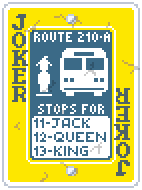
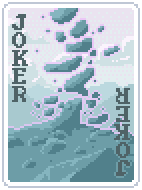
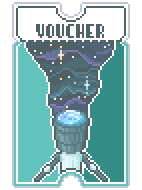
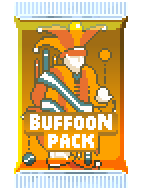
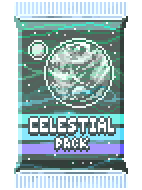

In [95]:
balatro

In [32]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [38]:
driver = webdriver.Firefox()

The geckodriver version (0.30.0) detected in PATH at /usr/local/bin/geckodriver might not be compatible with the detected firefox version (131.0.3); currently, geckodriver 0.35.0 is recommended for firefox 131.*, so it is advised to delete the driver in PATH and retry


In [39]:
d = {}

In [40]:
for joker_type in JokerType:
    driver.get(f'https://balatrogame.fandom.com/wiki/{"_".join(joker_type.value.split(" "))}')
    compats = driver.find_elements(By.XPATH, '//h2[contains(text(), "Compatibility")]/following-sibling::section//div[@class="pi-smart-data-value pi-data-value pi-font pi-item-spacing pi-border-color"]')
    d[joker_type] = [compat.text for compat in compats]

In [44]:
copyable = set()
perishable = set()
eternal = set()

In [72]:
for jt in JokerType:
    if jt not in eternal:
        print(f'JokerType.{jt.name},')

JokerType.GROS_MICHEL,
JokerType.ICE_CREAM,
JokerType.CAVENDISH,
JokerType.POPCORN,
JokerType.LUCHADOR,
JokerType.TURTLE_BEAN,
JokerType.DIET_COLA,
JokerType.RAMEN,
JokerType.SELZER,
JokerType.MR_BONES,
JokerType.INVISIBLE,


In [45]:
for joker_type, (c, p, e) in d.items():
    c, p, e = c == '✓ Yes', p == '✓ Yes', e == '✓ Yes'
    if c:
        copyable.add(joker_type)
    if p:
        perishable.add(joker_type)
    if e:
        eternal.add(joker_type)

In [51]:
for joker in JokerType:
    if joker not in eternal:
        print(joker)

JokerType.GROS_MICHEL
JokerType.ICE_CREAM
JokerType.CAVENDISH
JokerType.POPCORN
JokerType.LUCHADOR
JokerType.TURTLE_BEAN
JokerType.DIET_COLA
JokerType.RAMEN
JokerType.SELZER
JokerType.MR_BONES
JokerType.INVISIBLE


In [43]:
set(x[0] for x in d.values())

{'✓ Yes', '✗ No'}